In [1]:
from pyforest import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
df=pd.read_csv("cancer.csv")
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [3]:
df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [4]:
df.shape

(699, 14)

In [5]:
df.isnull().sum()

ID                               0
ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion                0
Single Epithelial Cell Size      0
Bare Nuclei                      0
Normal Nucleoli                  0
Bland Chromatin                  0
Mitoses                          0
Class                            0
Unnamed: 11                    699
Unnamed: 12                    699
Unnamed: 13                    699
dtype: int64

In [6]:
df.ID.value_counts()

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
1070935    2
385103     2
1293439    2
1240603    2
1277792    2
1168736    2
560680     2
1174057    2
822829     2
320675     2
897471     2
1114570    2
1339781    2
654546     2
704097     2
1017023    2
734111     2
1354840    2
769612     2
411453     2
1158247    2
1321942    2
1061990    2
733639     2
1218860    2
          ..
1096352    1
255644     1
1201870    1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
1184241    1
432809     1
1201834    1
1125035    1
888523     1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: ID, Length: 645, dtype: int64

In [6]:
df=df.drop(["Unnamed: 11","Unnamed: 12","Unnamed: 13"],axis=1)

In [7]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


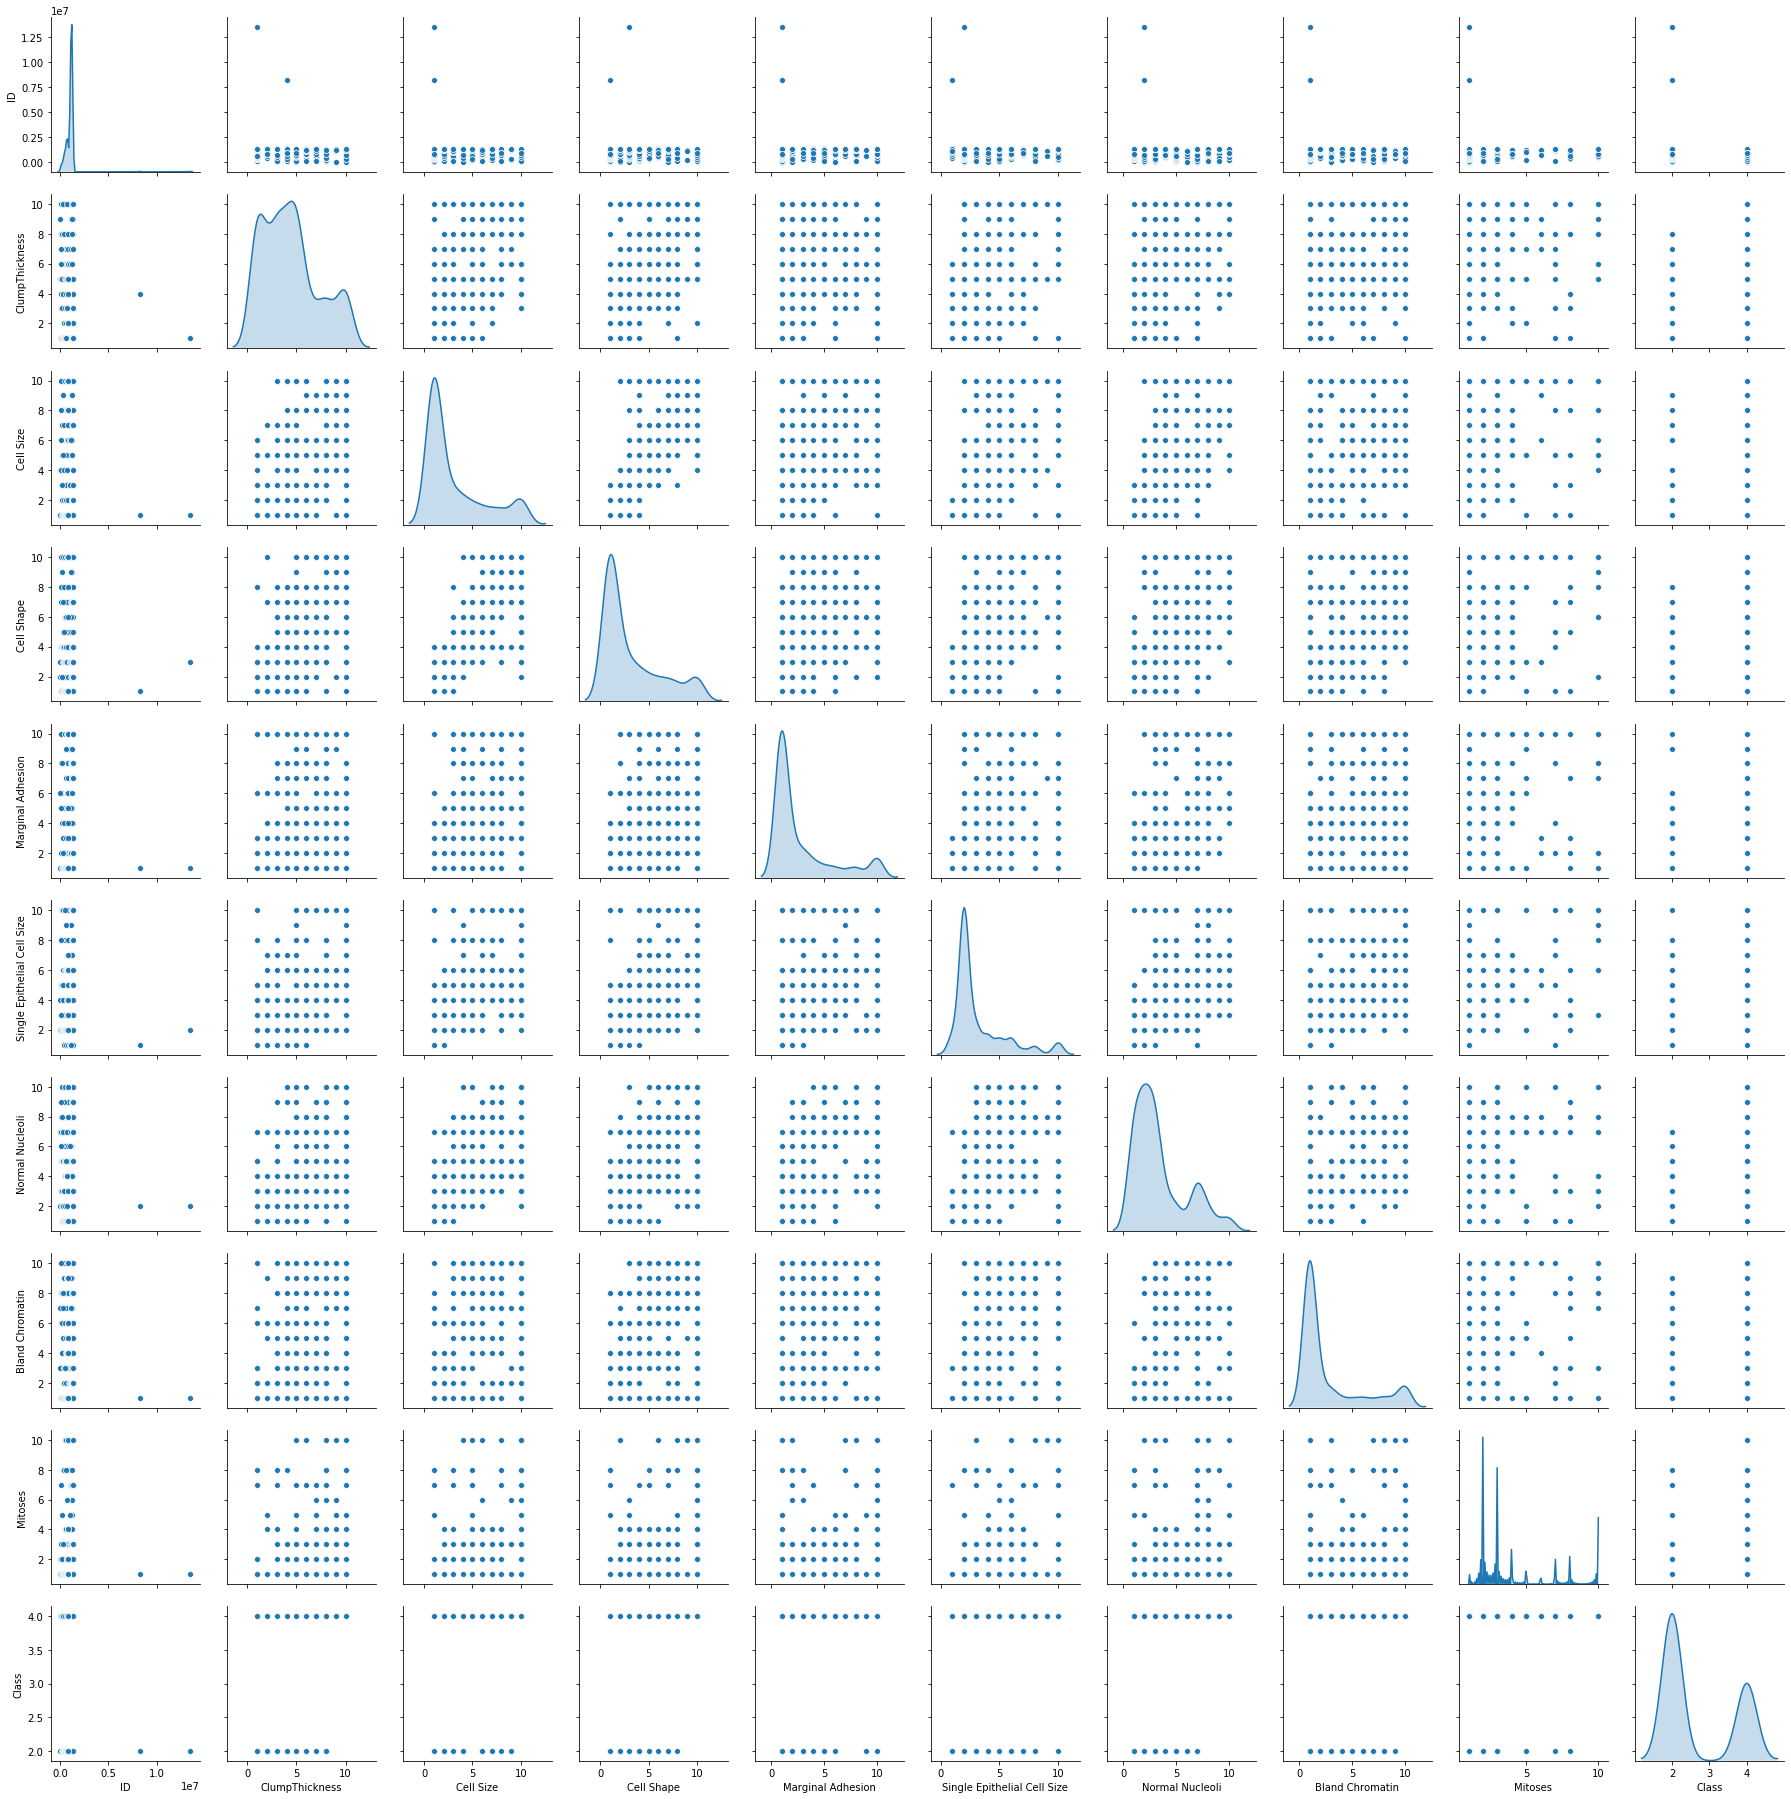

In [31]:
sns.pairplot(df,diag_kind="kde")

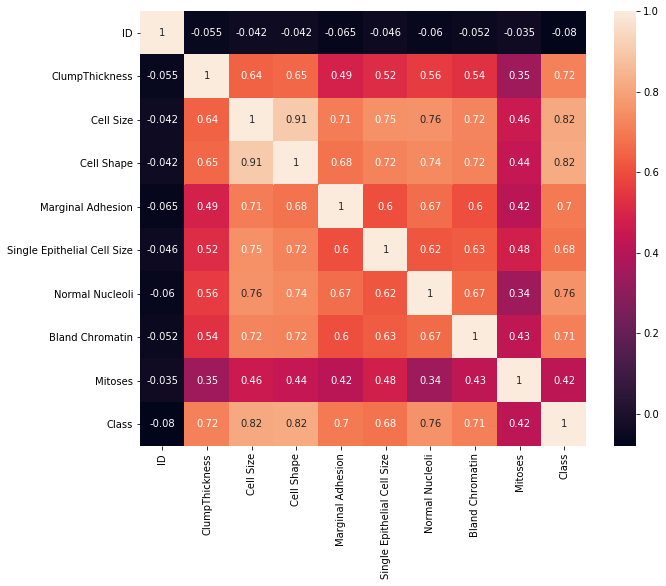

In [30]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

In [8]:
df[df['ID']==1033078]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
df[df['ID']==1033078].mean()

ID                             1033078.0
ClumpThickness                       3.0
Cell Size                            1.5
Cell Shape                           1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          5.5
Normal Nucleoli                      1.5
Bland Chromatin                      1.0
Mitoses                              3.0
Class                                2.0
dtype: float64

In [10]:
df.shape

(699, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
df = df[~(df[["Bare Nuclei"]] == "?").any(axis=1)]

In [13]:
df[df["Bare Nuclei"]=="?"]["ID"]

Series([], Name: ID, dtype: int64)

In [14]:
df["ClumpThickness"]=df["ClumpThickness"].astype(float)
df["Cell Size"]=df["Cell Size"].astype(float)
df["Cell Shape"]=df["Cell Shape"].astype(float)
df["Marginal Adhesion"]=df["Marginal Adhesion"].astype(float)
df["Single Epithelial Cell Size"]=df["Single Epithelial Cell Size"].astype(float)
df["Bare Nuclei"]=df["Bare Nuclei"].astype(float)
df["Normal Nucleoli"]=df["Normal Nucleoli"].astype(float)
df["Bland Chromatin"]=df["Bland Chromatin"].astype(float)
df["Mitoses"]=df["Mitoses"].astype(float)

In [15]:
df.groupby('ID').mean()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
63375,9.0,1.0,2.0,6.0,4.0,10.0,7.0,7.0,2.0,4.0
76389,10.0,4.0,7.0,2.0,2.0,8.0,6.0,1.0,1.0,4.0
95719,6.0,10.0,10.0,10.0,8.0,10.0,7.0,10.0,7.0,4.0
128059,1.0,1.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,2.0
142932,7.0,6.0,10.0,5.0,3.0,10.0,9.0,10.0,2.0,4.0
144888,8.0,10.0,10.0,8.0,5.0,10.0,7.0,8.0,1.0,4.0
145447,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,4.0
160296,5.0,8.0,8.0,10.0,5.0,10.0,8.0,10.0,3.0,4.0
167528,4.0,1.0,1.0,1.0,2.0,1.0,3.0,6.0,1.0,2.0


In [16]:
df1=df.groupby('ID').mean()
df1.shape

(630, 10)

In [17]:
df1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
63375,9.0,1.0,2.0,6.0,4.0,10.0,7.0,7.0,2.0,4.0
76389,10.0,4.0,7.0,2.0,2.0,8.0,6.0,1.0,1.0,4.0
95719,6.0,10.0,10.0,10.0,8.0,10.0,7.0,10.0,7.0,4.0
128059,1.0,1.0,1.0,1.0,2.0,5.0,5.0,1.0,1.0,2.0
142932,7.0,6.0,10.0,5.0,3.0,10.0,9.0,10.0,2.0,4.0


In [18]:
#################################################### PCA #########################################################

In [19]:
X_centered = (df1 - df1.mean(axis=0))/np.std(df1)

In [20]:
pca = PCA(n_components=10)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
X_pca = pca.transform(X_centered)

In [22]:
print("shape:",X_pca.shape)
print()
print("pca.explained_variance: ",pca.explained_variance_)
print()
print("pca.explained_variance_ratio: ",pca.explained_variance_ratio_)

shape: (630, 10)

pca.explained_variance:  [6.73429581 0.79605138 0.55699941 0.47763242 0.37469222 0.30816999
 0.29620683 0.25583862 0.12691264 0.08909892]

pca.explained_variance_ratio:  [0.67236065 0.07947878 0.05561153 0.04768743 0.03740975 0.03076808
 0.02957367 0.02554325 0.01267112 0.00889575]


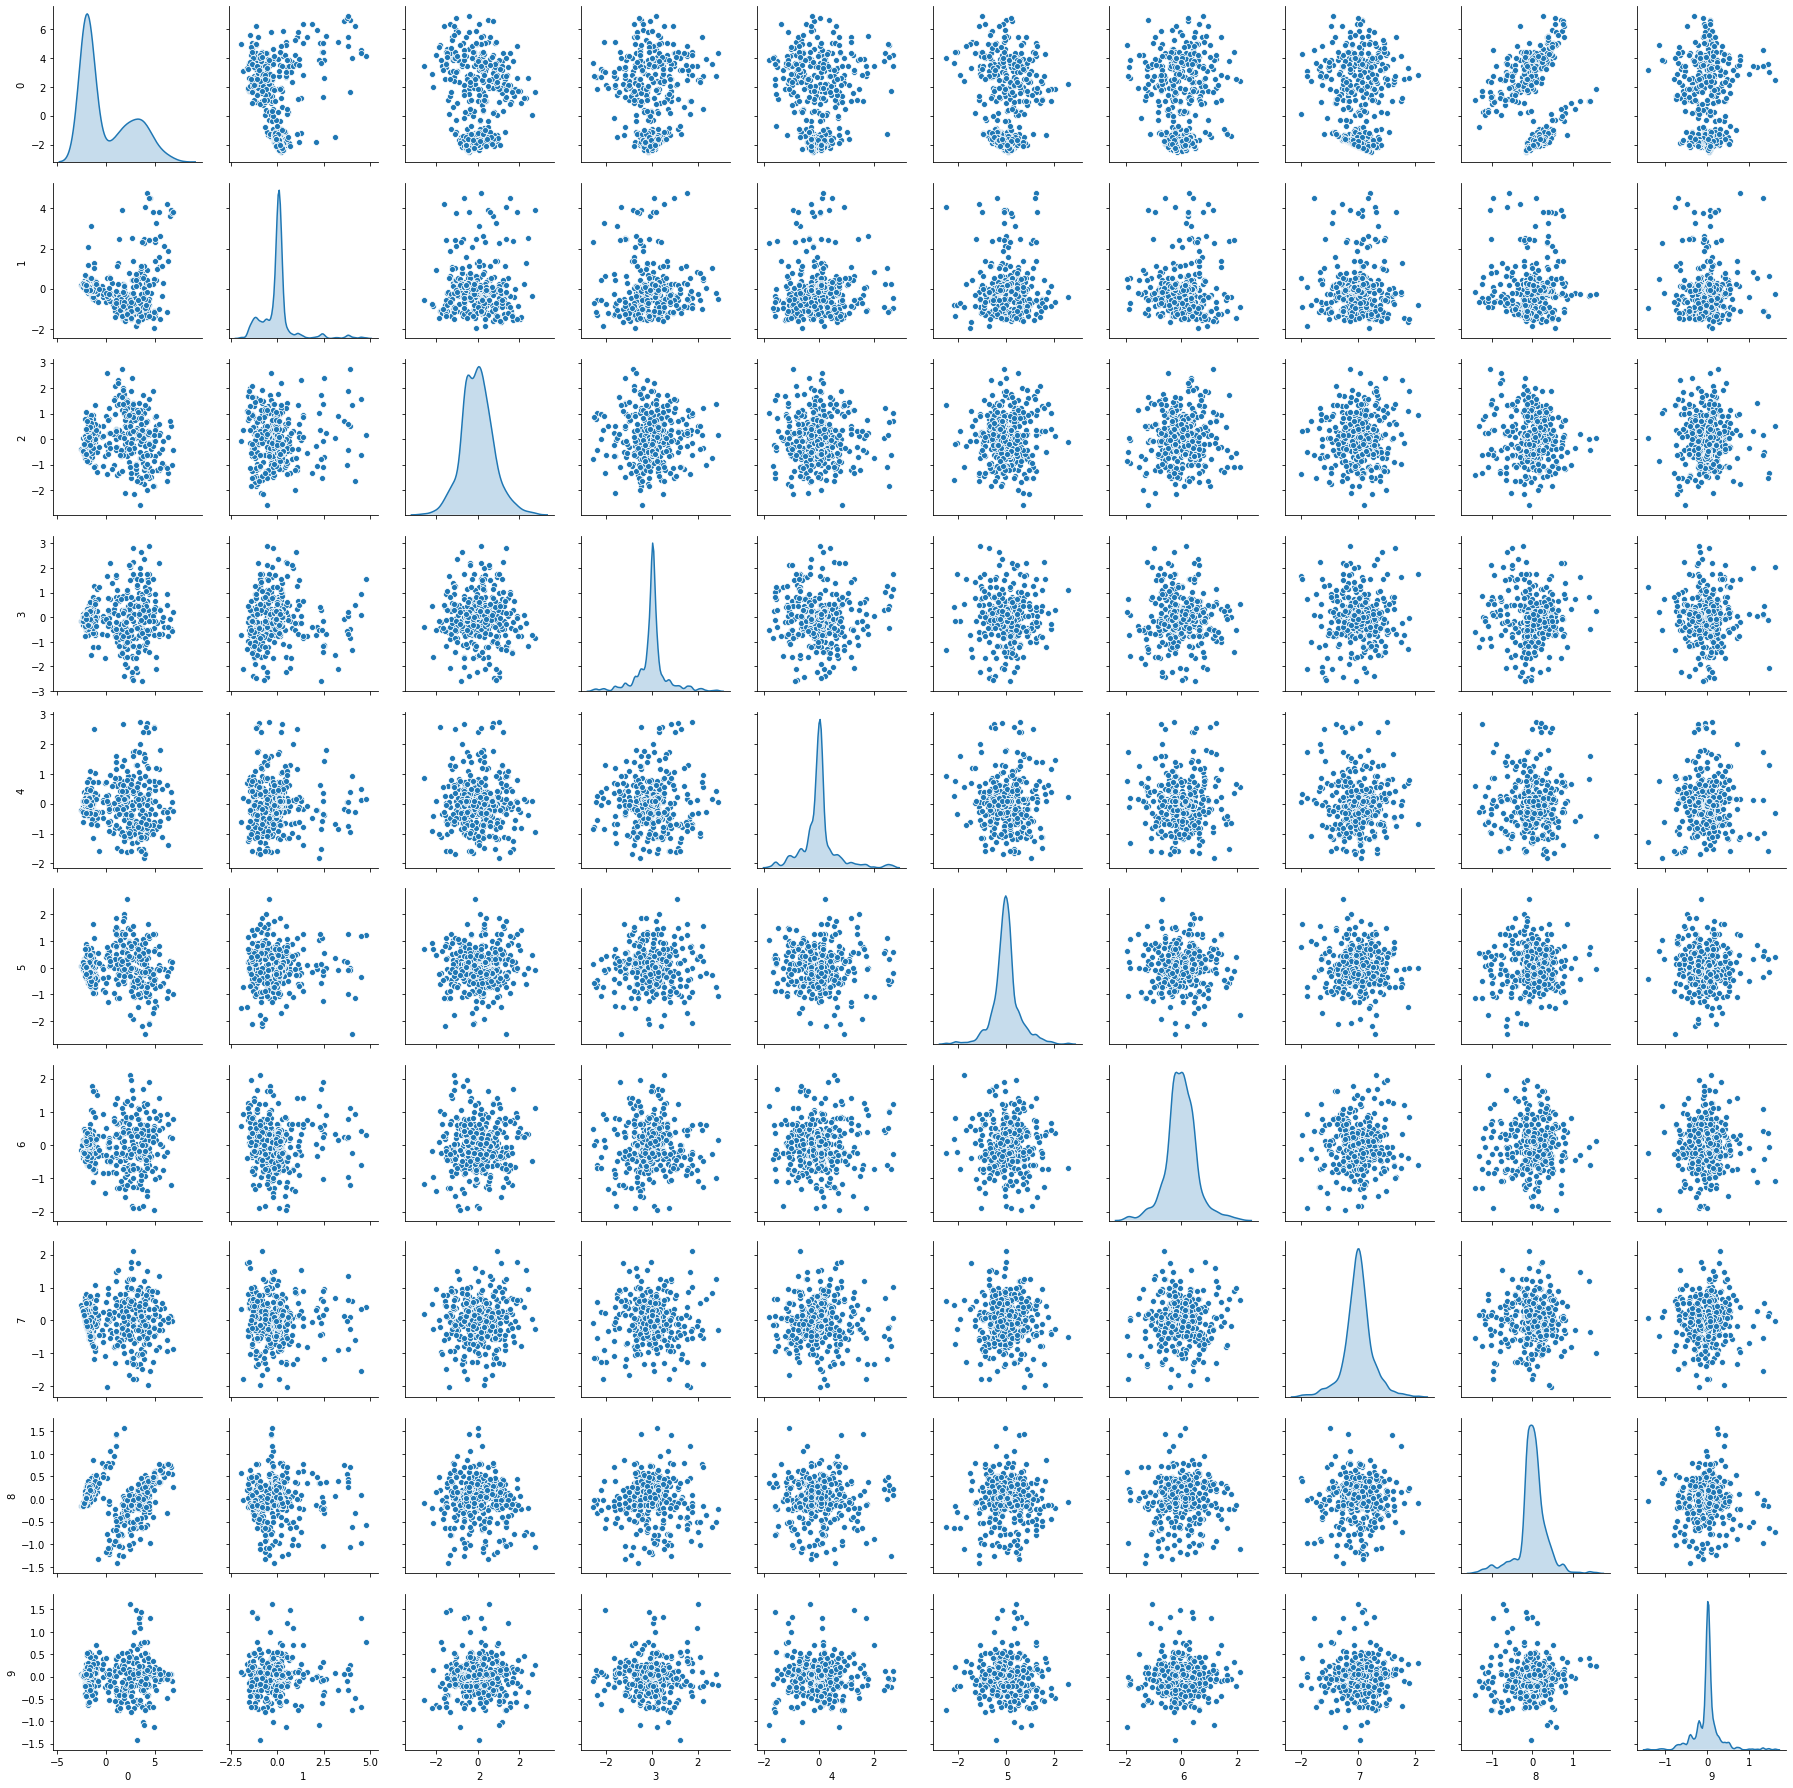

In [78]:
sns.pairplot(pd.DataFrame(X_pca),diag_kind='kde')

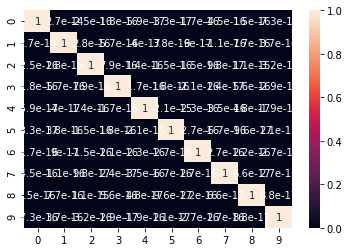

In [79]:
sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True)

In [ ]:
##################################### with 1 PCA Component ##################################################

In [75]:
pd.DataFrame(X_pca).head()

,0,1,2,3,4,5,6,7,8,9
0,2.403690,-0.839185,0.702270,-1.010382,-1.087665,0.987078,-0.119023,-1.654136,0.021097,-0.253945
1,1.709369,-1.519126,1.860417,-0.535487,0.072272,-0.089926,0.951137,0.536535,-0.112387,-0.572848
2,5.978966,2.122215,-1.045400,-0.403850,-0.215358,-0.033399,-0.323074,0.380359,0.489818,0.014029
3,-1.499841,-0.336172,-0.781112,-0.521292,-0.178214,0.726760,1.053991,-0.102126,0.373467,0.077088
4,4.043374,-1.071409,-0.223517,0.238521,-1.648257,0.348287,0.618057,0.651767,0.536689,-0.730617


In [90]:
x=pd.DataFrame(X_pca[:,:1])
x.head()

,0
0,2.403690
1,1.709369
2,5.978966
3,-1.499841
4,4.043374


In [91]:
def full_cluster(size):
    from sklearn.cluster import KMeans
    cluster_range = range( 1, 10)
    cluster_errors = []
    cluster_sil_scores = []
    for num_clusters in cluster_range:
      clusters = KMeans( num_clusters, n_init = 8)
      clusters.fit(x)
      labels = clusters.labels_                     # capture the cluster lables
      centroids = clusters.cluster_centers_         # capture the centroids
      cluster_errors.append( clusters.inertia_ )    # capture the intertia
    # combine the cluster_range and cluster_errors into a dataframe by combining them
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
    # print(clusters_df[0:15])

    plt.figure(figsize=(12,6))# Elbow plot
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

    kmeans = KMeans(n_clusters=size)# Number of clusters
    kmeans = kmeans.fit(x)# Fitting the input data
    labels = kmeans.predict(x) # Getting the cluster labels
    centroids = kmeans.cluster_centers_# Centroid values
    print("Centroid values")
    print("sklearn")
    print(centroids)

    prediction= kmeans.predict(x)
    x["group"] = prediction
    x.head()

    for i in cluster_range:
        points = np.array(x.loc[x['group'] == i])
    #     print(points)

    sns.pairplot(x,diag_kind="kde",hue="group")

Centroid values
sklearn
[[-1.89091618]
 [ 4.25351627]
 [ 1.7263756 ]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


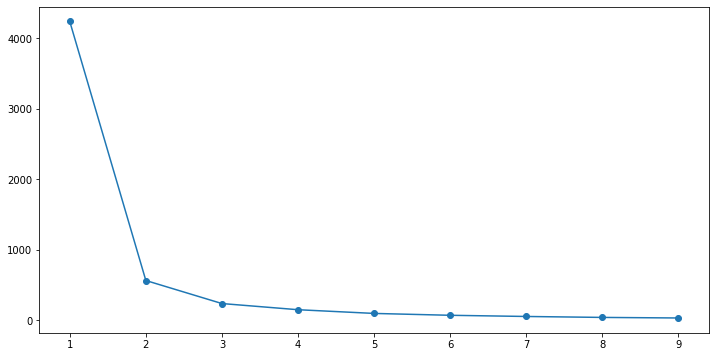

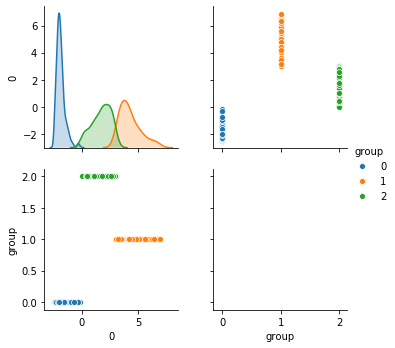

In [92]:
full_cluster(3)

In [58]:
##################################### with 2 PCA Component ##################################################

In [93]:
x=pd.DataFrame(X_pca[:,:2])
x.head()

,0,1
0,2.403690,-0.839185
1,1.709369,-1.519126
2,5.978966,2.122215
3,-1.499841,-0.336172
4,4.043374,-1.071409


Centroid values
sklearn
[[-1.80548354  0.08239133]
 [ 2.89519136 -0.6545039 ]
 [ 4.98136096  2.52971239]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


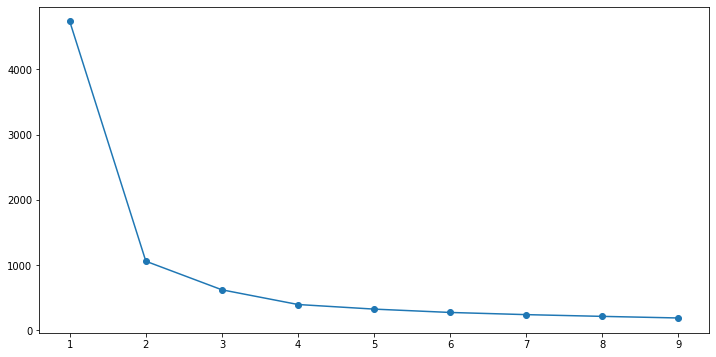

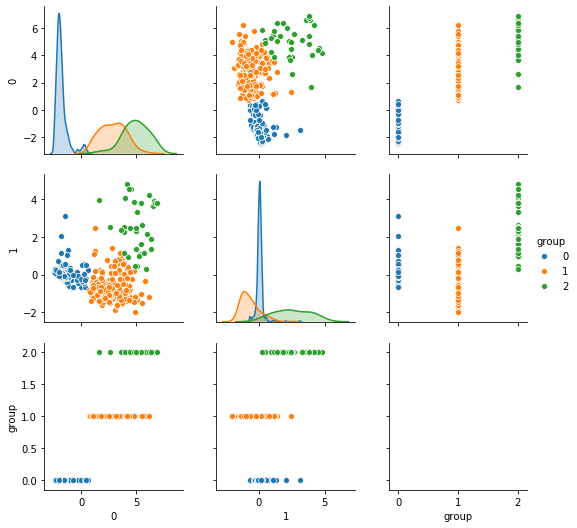

In [94]:
full_cluster(3)

# Conclusion:
    We can get better saparation with PCA =1